# Importing Liberaries
- numpy
- pandas
- matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading The Dataset

In [2]:
df=pd.read_csv('Downloads/house_price.csv')

In [3]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


In [5]:
df.describe()

,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


# Drop rows contain null values

In [6]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


In [7]:
#since I cet the error below, I tried to show it with exception handeling 
try:
    pd.to_numeric(df.Area)
except:
    print('there is an error')

there is an error


In [8]:
df.Area.value_counts()

75                 111
100                103
90                  95
60                  94
105                 92
                  ... 
177                  1
221                  1
680                  1
 8,400,000,000       1
312                  1
Name: Area, Length: 243, dtype: int64

# All wrong values in df.Area

In [9]:
for i in df.Area:
    if ',' in i:
        print (i)

 3,310,000,000 
 16,160,000,000 
 1,000 
 8,400,000,000 
 3,600 
 2,550,000,000 


# Drop rows with wrong values in df.Area

In [10]:
df=df.drop(df.Area[(df.Area.apply(lambda x: True if ',' in x else False))].index)

In [11]:
df.Area.value_counts()

75     111
100    103
90      95
60      94
105     92
      ... 
177      1
257      1
287      1
929      1
166      1
Name: Area, Length: 237, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   object 
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 171.8+ KB


# Try again to convert df.Area to numeric values

In [13]:
try:
    df.Area=pd.to_numeric(df.Area)
except:
    print('there is an error')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3450 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3450 non-null   int64  
 1   Room        3450 non-null   int64  
 2   Parking     3450 non-null   bool   
 3   Warehouse   3450 non-null   bool   
 4   Elevator    3450 non-null   bool   
 5   Address     3450 non-null   object 
 6   Price       3450 non-null   float64
 7   Price(USD)  3450 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 171.8+ KB


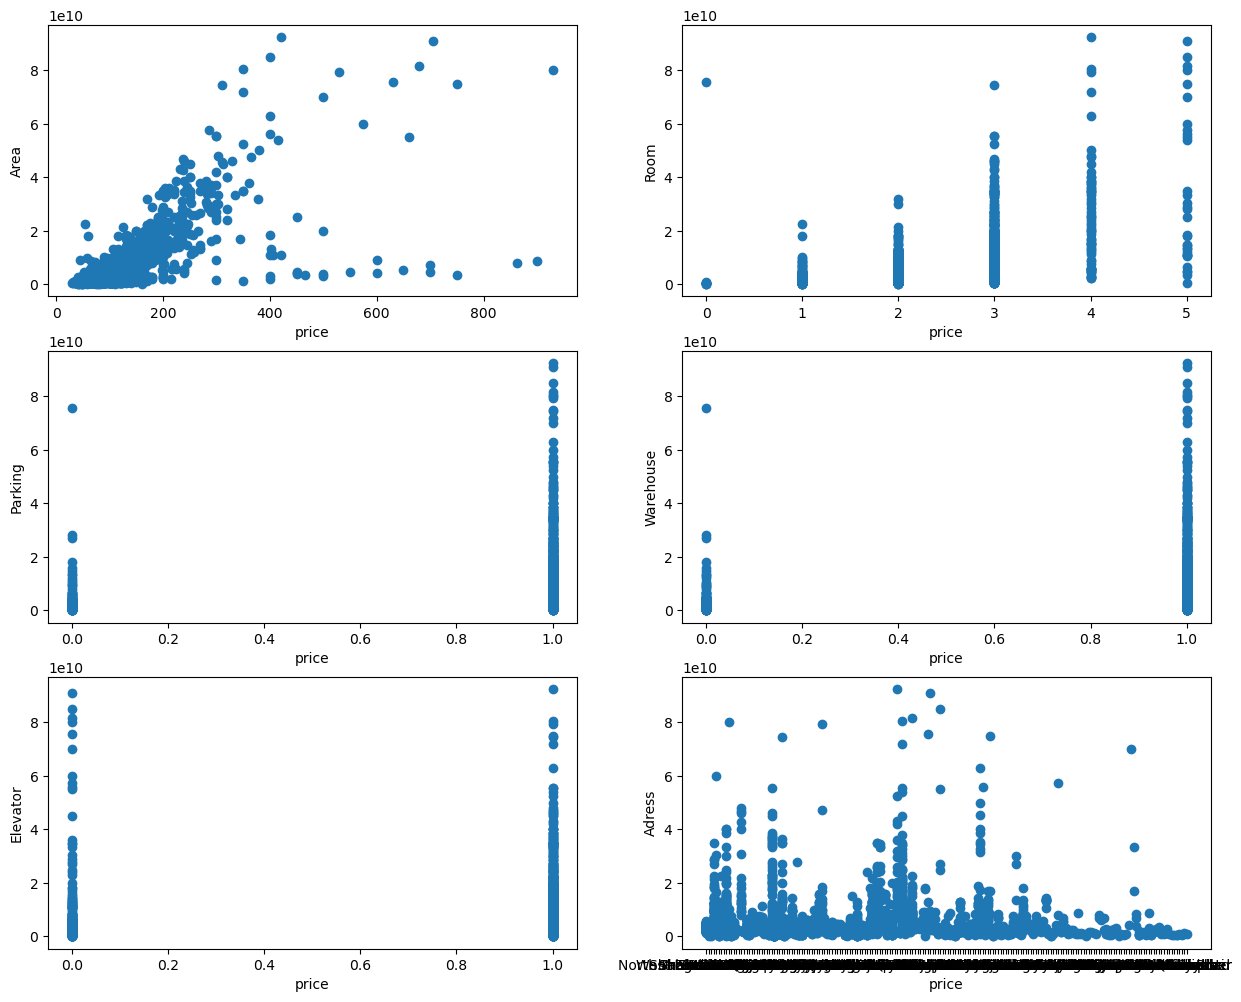

In [14]:
fig = plt.figure(figsize = (15, 12))
plt.subplot(3, 2, 1);plt.scatter(df.Area,df.Price);plt.ylabel('Area');plt.xlabel('price');

plt.subplot(3, 2, 2);plt.scatter(df.Room,df.Price);plt.ylabel('Room');plt.xlabel('price');

plt.subplot(3, 2, 3);plt.scatter(df.Parking,df.Price);plt.ylabel('Parking');plt.xlabel('price');

plt.subplot(3, 2, 4);plt.scatter(df.Warehouse,df.Price);plt.ylabel('Warehouse');plt.xlabel('price');

plt.subplot(3, 2, 5);plt.scatter(df.Elevator,df.Price);plt.ylabel('Elevator');plt.xlabel('price');

plt.subplot(3, 2, 6);plt.scatter(df.Address,df.Price);plt.ylabel('Adress');plt.xlabel('price');

plt.show()


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


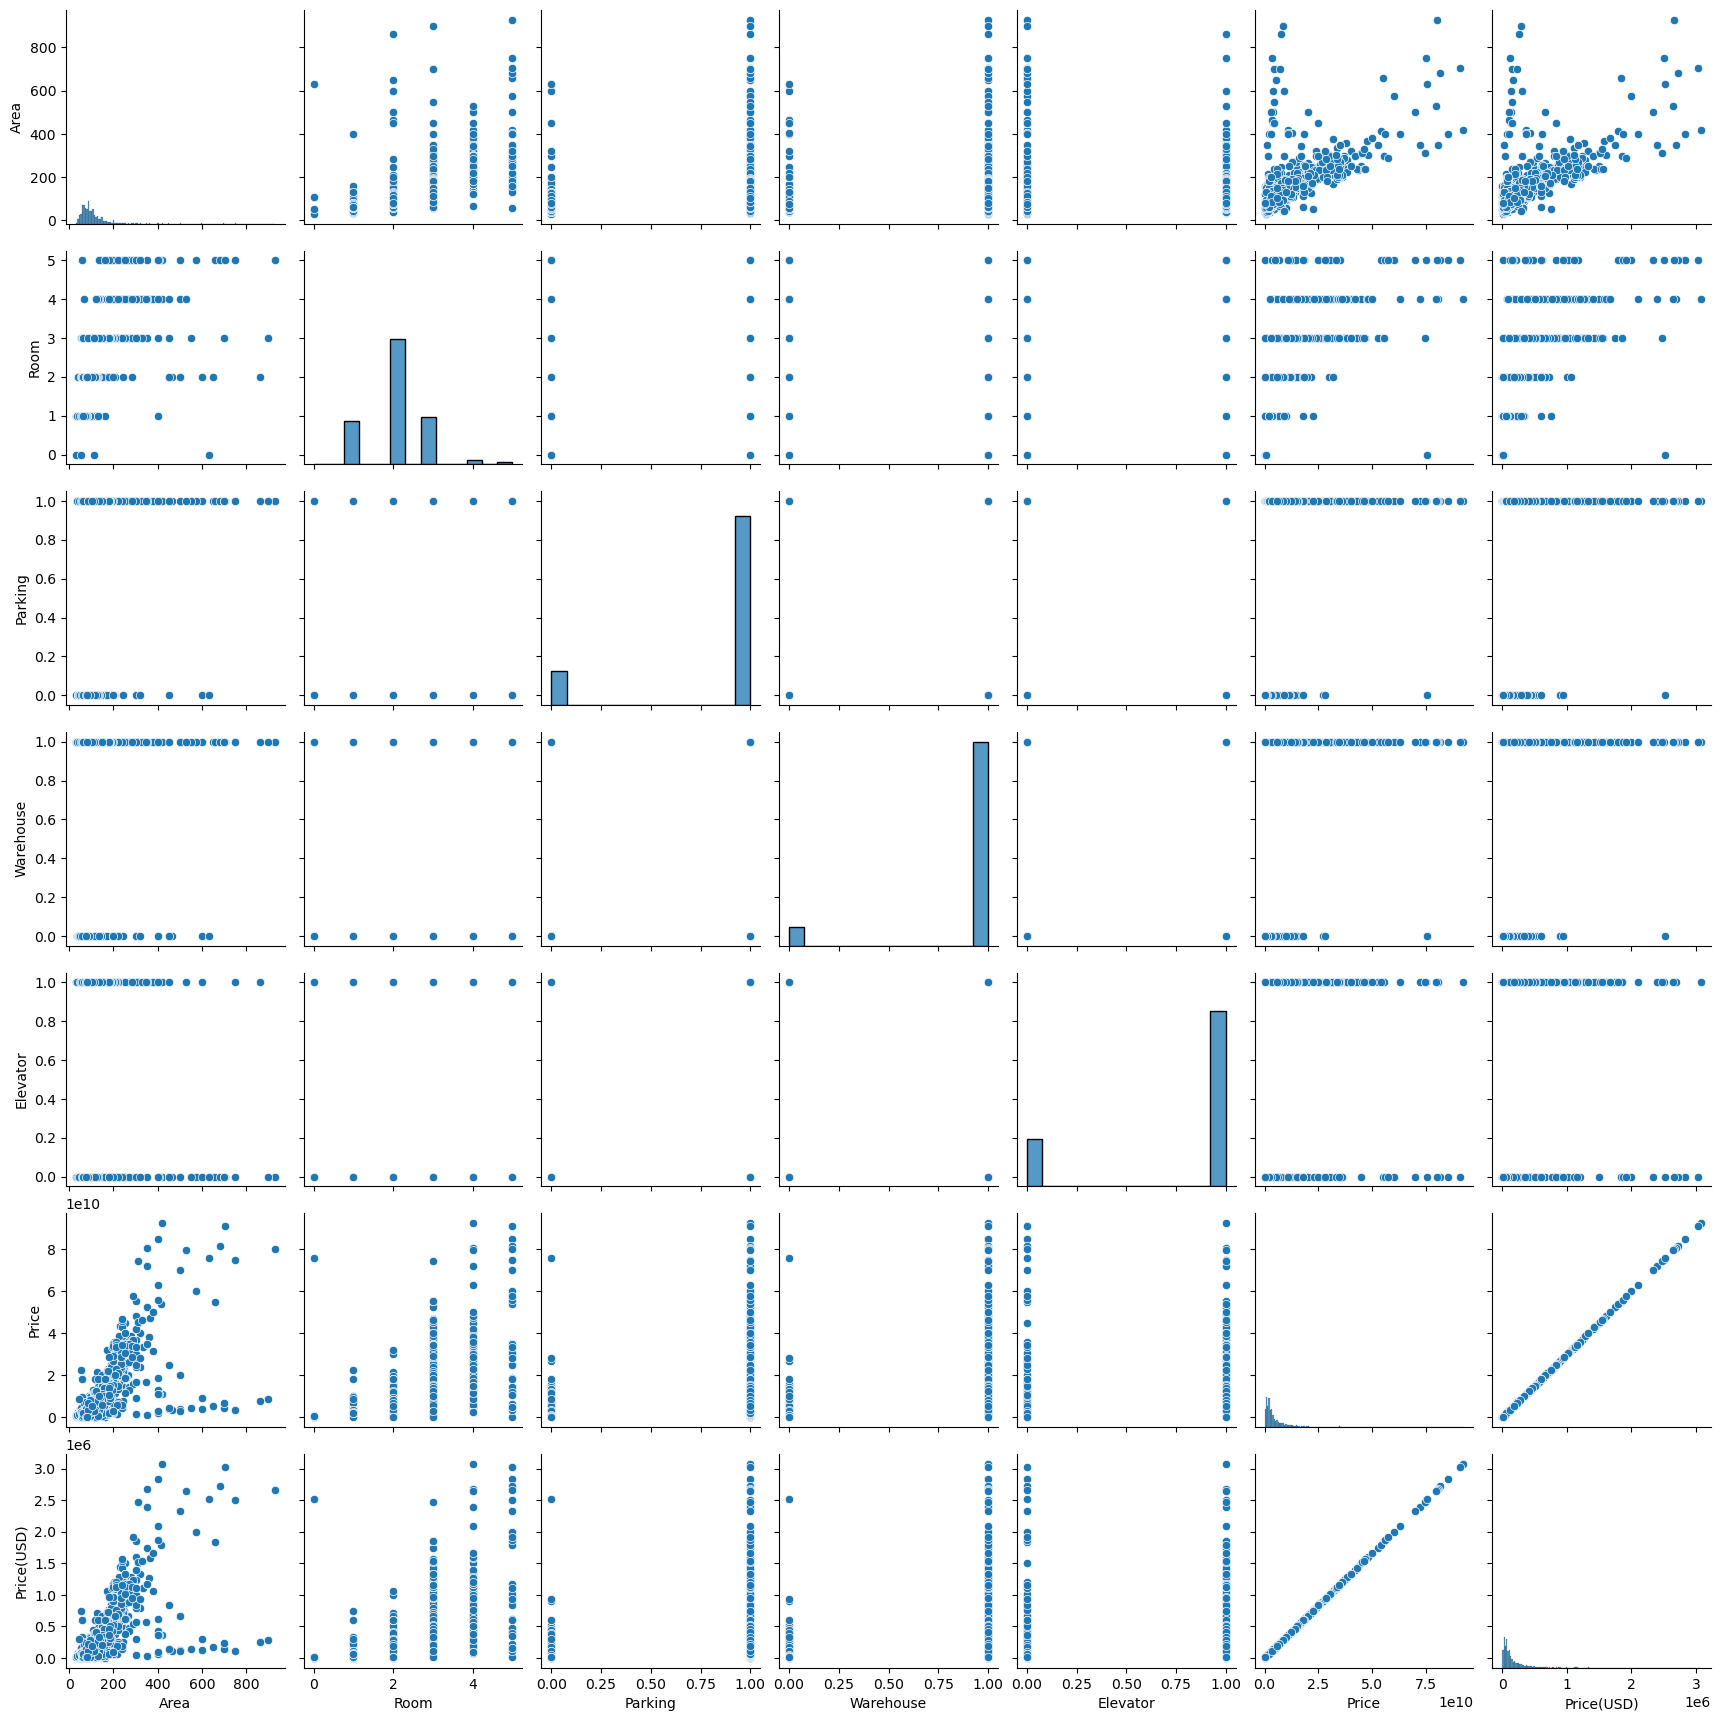

In [15]:
#Another plot that might help
sns.pairplot(df)

# Simple linear regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [17]:
y=df.Price
X=df[['Area','Room','Parking','Warehouse','Elevator']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
reg=LinearRegression()

In [20]:
reg.fit(X_train,y_train)

LinearRegression()

In [21]:
print(reg.coef_);
print(reg.intercept_)

[ 7.21579127e+07  1.41534321e+09 -1.24809193e+07  1.29991792e+09
  8.68829908e+08]
-7177700190.9657135


In [22]:
print('the first score',reg.score(X_test,y_test))

the first score 0.5404056481252149


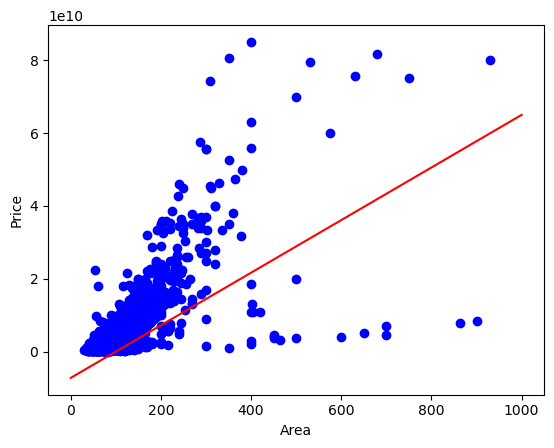

In [29]:
plt.scatter(X_train.Area,y_train,color='blue')

XX = np.arange(0.0, 1000.0, 0.01)

yy = reg.intercept_+ reg.coef_[0]*XX

plt.plot(XX,yy,'-r')
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Improving the dataset

In [30]:
df2=df[df.Area<300]
y2=df2.Price
X2=df2[['Area','Room','Parking','Warehouse','Elevator']]

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2)

In [32]:
reg2=LinearRegression()
reg2.fit(X2_train,y2_train)

LinearRegression()

In [33]:
print(reg2.coef_);
print(reg2.intercept_)

[ 1.27602639e+08 -1.66410099e+09  3.16341618e+08  3.96666499e+08
  9.42193070e+06]
-5185316094.010915


In [34]:
print('the second score is:',reg2.score(X2_test,y2_test))

the second score is: 0.600492430597945


# More dataset improving by deleting rows with Address les than 10 times repeatation

In [35]:
address=(df.Address.value_counts()).index[df.Address.value_counts()>10]
address


Index(['Punak', 'Pardis', 'West Ferdows Boulevard', 'Gheitarieh', 'Shahran',
       'Saadat Abad', 'Parand', 'Shahr-e-Ziba', 'Southern Janatabad',
       'Jeyhoon', 'Central Janatabad', 'Persian Gulf Martyrs Lake', 'Andisheh',
       'Ostad Moein', 'East Ferdows Boulevard', 'Shahrake Qods', 'Niavaran',
       'Pasdaran', 'Pirouzi', 'Salsabil', 'Shahrake Gharb', 'Farmanieh',
       'Heravi', 'Ekhtiarieh', 'Islamshahr', 'Yousef Abad', 'Feiz Garden',
       'Northern Janatabad', 'Qasr-od-Dasht', 'North Program Organization',
       'Zaferanieh', 'Beryanak', 'Narmak', 'Aqdasieh', 'Pakdasht',
       'Azarbaijan', 'Si Metri Ji', 'Tenant', 'Southern Program Organization',
       'Abazar', 'Damavand', 'Velenjak', 'Marzdaran', 'Karoon', 'Jordan',
       'Elahieh', 'Kahrizak', 'Golestan', 'Northern Chitgar', 'Mirdamad',
       'Northren Jamalzadeh', 'Amirabad', 'Kamranieh', 'Dorous', 'Hashemi',
       'Sattarkhan', 'Amirieh', 'Shahryar', 'Qazvin Imamzadeh Hassan',
       'Komeil', 'Railway', 'We

In [36]:
add_list=[]
for i in df.Address:
    if i in address:
        add_list.append(True)
    else:
        add_list.append(False)


In [37]:
df.Address[add_list]

0                  Shahran
1                  Shahran
2                   Pardis
3            Shahrake Qods
4           Shahrake Gharb
               ...        
3474    Southern Janatabad
3475              Niavaran
3476                Parand
3477                Dorous
3478                Parand
Name: Address, Length: 3018, dtype: object

In [38]:
df3=df[add_list]
y3=df3.Price
X3=df3[['Area','Room','Parking','Warehouse','Elevator']]

In [39]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3)
reg3=LinearRegression()
reg3.fit(X3_train,y3_train)
print(reg3.coef_);
print('===================================');
print(reg3.intercept_);
print('===================================');
print('the third score is:',reg3.score(X3_test,y3_test));
print('===================================');

[ 7.17716197e+07  1.53320035e+09 -2.18899864e+08  1.48426263e+09
  1.05697713e+09]
-7374094010.239107
the third score is: 0.6238378399454672


# We can recognize that removing address that repeated less than 10 times decrease the score

# Polymal regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [41]:
y4=df[['Price']]
X4=df[['Area']]
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4)
poly=PolynomialFeatures(degree=2)
train_x_poly=poly.fit_transform(X4_train)
train_x_poly

array([[1.0000e+00, 6.2000e+01, 3.8440e+03],
       [1.0000e+00, 6.7000e+01, 4.4890e+03],
       [1.0000e+00, 1.7500e+02, 3.0625e+04],
       ...,
       [1.0000e+00, 1.7000e+02, 2.8900e+04],
       [1.0000e+00, 1.2500e+02, 1.5625e+04],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

In [42]:
clf=LinearRegression()
train_y4=clf.fit(train_x_poly,y4_train)
print(clf.coef_);
print(clf.intercept_)


[[ 0.00000000e+00  1.38391133e+08 -1.21970006e+05]]
[-7.55592127e+09]


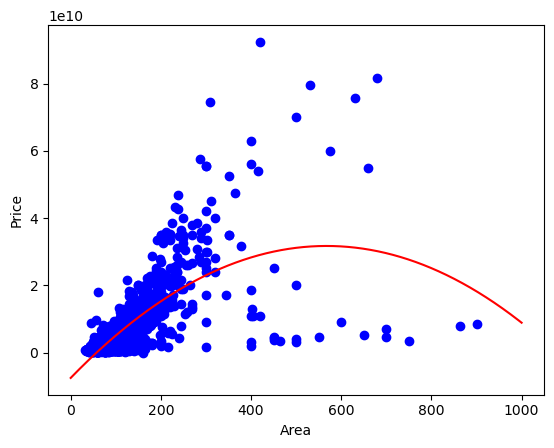

In [43]:
plt.scatter(X4_train,y4_train,color='blue')
XX = np.arange(0.0, 1000.0, 0.01)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

In [44]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(X4_test)
test_y_ = clf.predict(test_x_poly)
print("R2-score: %.2f" % r2_score(y4_test,test_y_ ) )

R2-score: 0.54
